In [6]:
import mglearn
X, y = mglearn.datasets.make_forge()
print(type(X))

<class 'numpy.ndarray'>


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


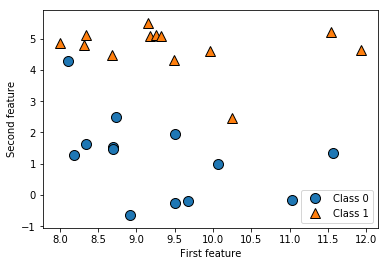

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot datasets
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

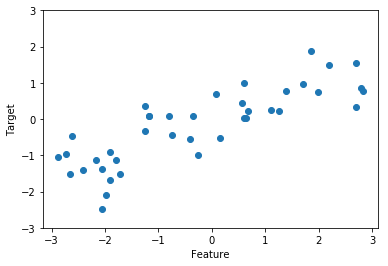

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [5]:
import numpy as np
print("sample counts per class: \n{}".format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(set(zip(cancer.target_names, np.bincount(cancer.target))))

sample counts per class: 
{'malignant': 212, 'benign': 357}
{('malignant', 212), ('benign', 357)}


In [16]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [18]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [19]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


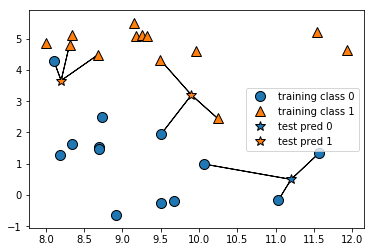

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [22]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train, y_train)
print("Test set prediction: {}".format(clf.predict(X_test)))

Test set prediction: [1 0 1 0 1 0 0]


In [28]:
print("Test set scores: {:.2f}".format(clf.score(X_test, y_test)))

Test set scores: 0.86


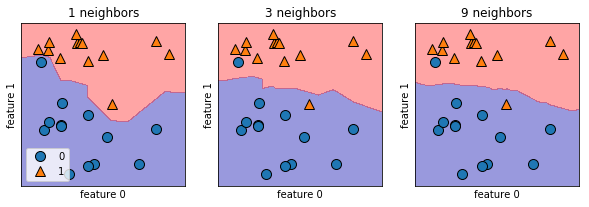

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [35]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [37]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf =KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

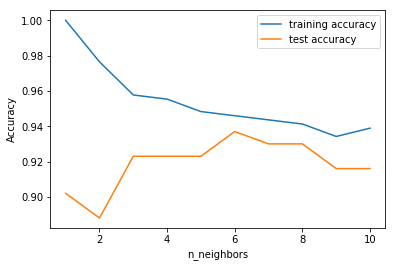

In [38]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=40)

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test predictions: \n{}".format(reg.predict(X_test)))

Test predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [52]:
print([i for i in reg.predict(X_test)])

[-0.05396538712649832, 0.35686046411195704, 1.1367192298471605, -1.8941568209640478, -1.1388139797014292, -1.6311338205526333, 0.35686046411195704, 0.9124137361448525, -0.4468044564355589, -1.1388139797014292]


In [53]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


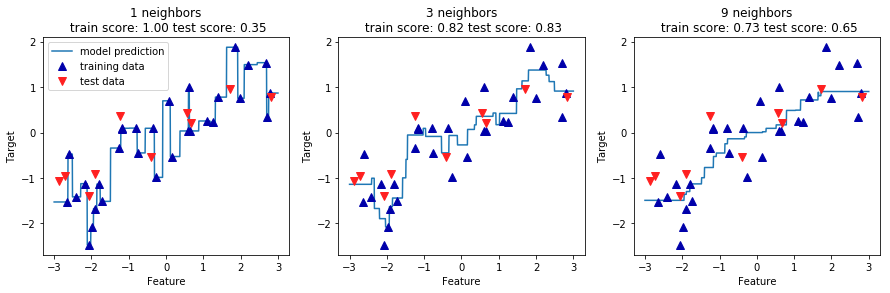

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


fit, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbors\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test) ))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["model prediction", "training data", "test data"], loc="best")

w[0]: 0.393906  b: -0.031804


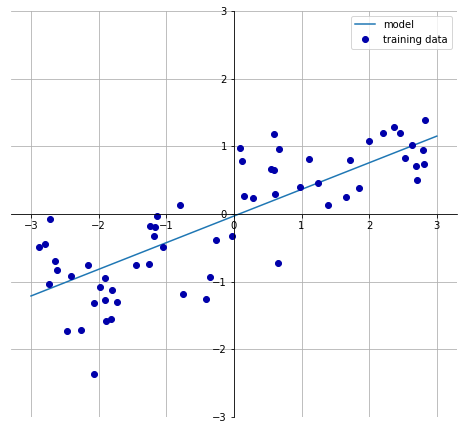

In [9]:
mglearn.plots.plot_linear_regression_wave()

In [10]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [11]:
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.67
test score: 0.66


In [13]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [14]:
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.95
test score: 0.61


Training score is higher than test score which indicates over-fitting.

use ridge regression to try again

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.89
Test score: 0.75


In [17]:
print("ridge.coef_: {}".format(ridge.coef_))

ridge.coef_: [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31207081e+00  1.71845119e+00 -2.59766697e+00 -1.32370675e+00
 -2.81242223

In [18]:
print("X_train.shape: {}".format(X_train.shape))

X_train.shape: (379, 104)


In [21]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training score: 0.79
Test score: 0.64


In [22]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training score: 0.93
Test score: 0.77


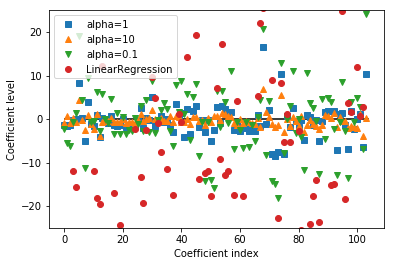

In [28]:
plt.plot(ridge.coef_, 's', label="alpha=1")
plt.plot(ridge10.coef_, '^', label="alpha=10")
plt.plot(ridge01.coef_, 'v', label="alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient level")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend(loc="best")

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("No. of features: {}".format(np.sum(lasso.coef_!=0)))

Training score: 0.29
Test score: 0.21
No. of features: 4


In [33]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("No of features: {}".format(np.sum(lasso001.coef_!=0)))

Training score: 0.90
test score: 0.77
No of features: 33


In [34]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("test score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("No of features: {}".format(np.sum(lasso0001.coef_!=0)))

Training score: 0.95
test score: 0.64
No of features: 96


Text(0,0.5,'Coefficient values')

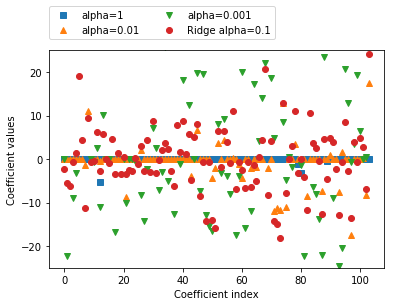

In [39]:
plt.plot(lasso.coef_, 's', label="alpha=1")
plt.plot(lasso001.coef_, '^', label="alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="alpha=0.001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient values")

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


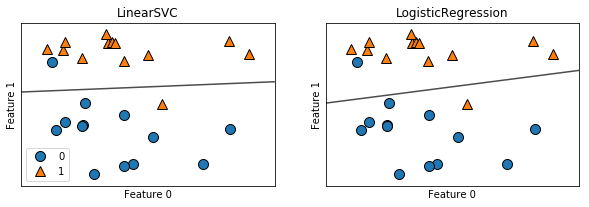

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

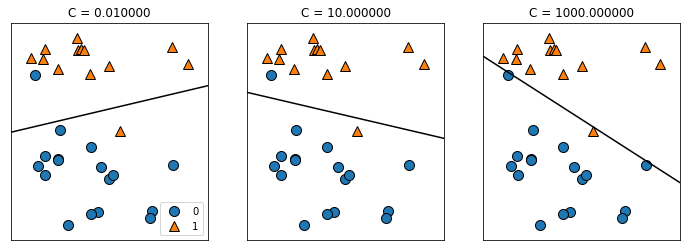

In [46]:
mglearn.plots.plot_linear_svc_regularization()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.96


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.2f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg100.score(X_test,  y_test)))

Training set score: 0.97
Test set score: 0.97


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
print(cancer.data.shape)

(569, 30)


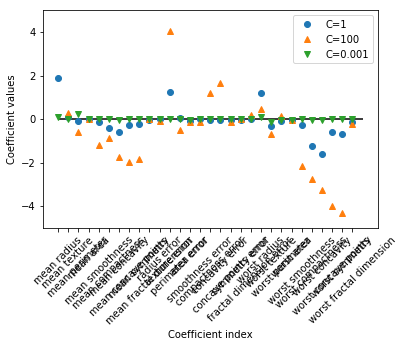

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=45)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient values")
plt.legend()

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training error for C=0.001: 0.91
Test error for C=0.001: 0.92
Training error for C=1: 0.96
Test error for C=1: 0.96
Training error for C=100: 0.99
Test error for C=100: 0.98


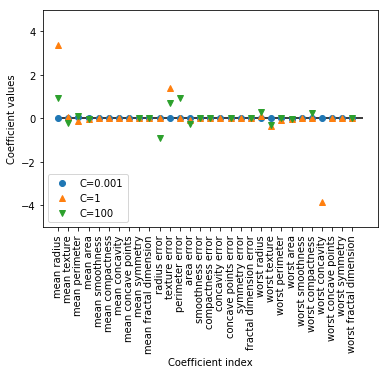

In [11]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training error for C={}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test error for C={}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient values")
plt.ylim(-5, 5)
plt.legend(loc=3)

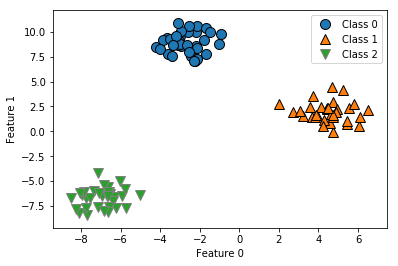

In [8]:
from sklearn.datasets import make_blobs
import mglearn

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [10]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("coefficient shape: {}".format(linear_svm.coef_.shape))
print("intercept shape: {}".format(linear_svm.intercept_.shape))

coefficient shape: (3, 2)
intercept shape: (3,)


In [19]:
print(linear_svm.coef_)
print(linear_svm.intercept_)
print(linear_svm.coef_[0])

[[-0.17492465  0.23141085]
 [ 0.47621108 -0.06936677]
 [-0.18914251 -0.20399649]]
[-1.0774498   0.13140529 -0.08604808]
[-0.17492465  0.23141085]


In [11]:
import numpy as np

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    print(coef, intercept, color)
    print(coef.shape)

[-0.1749244  0.2314098] -1.0774555318331125 b
(2,)
[ 0.47621545 -0.06936504] 0.13140888837097472 r
(2,)
[-0.18914243 -0.20399655] -0.08604806073100528 g
(2,)


In [23]:
print(np.linspace(0,1))

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


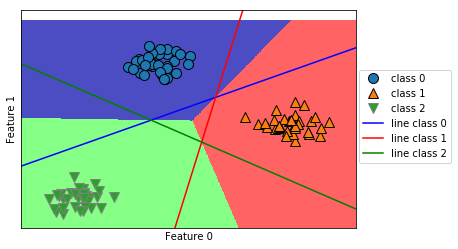

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01, 0.3))

In [3]:
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [4]:
import numpy as np

counts = {}
for label in np.unique(y):
    counts[label] = np.sum(X[y == label], axis=0)
print("Feature counts: {}".format(counts))

Feature counts: {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy of training set: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy of test set: {:.2f}".format(tree.score(X_test, y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 0.91


In [85]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy of training : {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of test: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy of training : 0.993
Accuracy of test: 0.902


In [9]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["mglignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

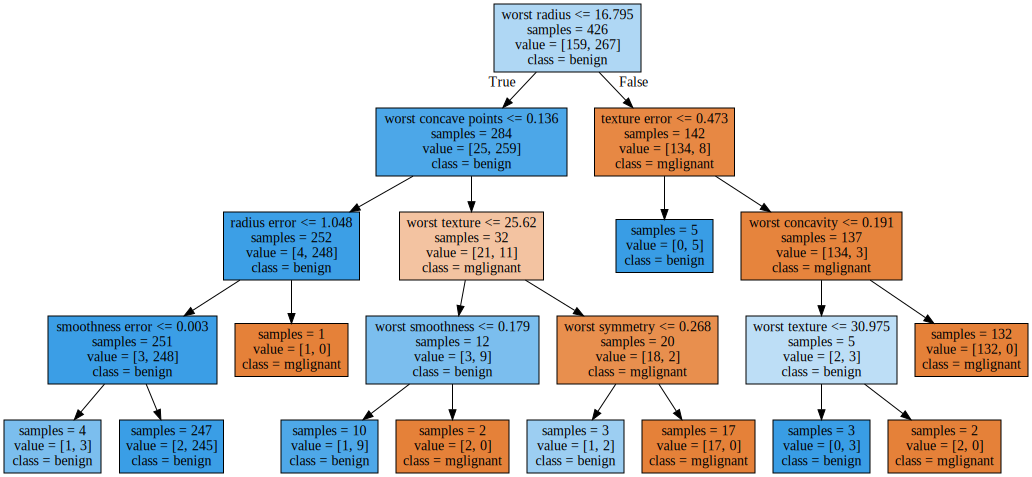

In [86]:
import graphviz

with open("tree.dot") as f:
    graph_read = f.read()
graphviz.Source(graph_read)

In [87]:
print("Feature importance: \n{}".format(tree.feature_importances_))

Feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.72099985 0.         0.         0.         0.
 0.02007711 0.01727487 0.         0.         0.         0.
 0.0124106  0.         0.         0.05097828 0.         0.11722141
 0.         0.03525964 0.01026499 0.         0.         0.01551325]


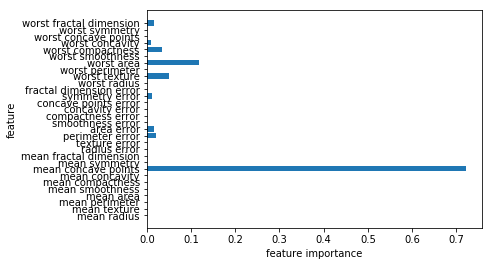

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    
plot_feature_importance_cancer(tree)

In [28]:
import pandas as pd
import mglearn
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0,0.5,'Price in $')

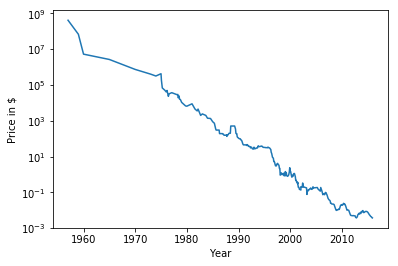

In [29]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $")

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [51]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [54]:
def ram_price_prediction(model_method):
    X_train = data_train.date[:, np.newaxis]
    y_train = np.log(data_train.price)
    
    estimator = model_method.fit(X_train, y_train)
    
    X_all = ram_prices.date[:, np.newaxis]
    pred = estimator.predict(X_all)
    price_pred = np.exp(pred)
    return price_pred

price_tree = ram_price_prediction(DecisionTreeRegressor())
price_lr = ram_price_prediction(LinearRegression())

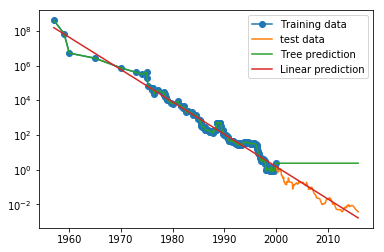

In [57]:
plt.semilogy(data_train.date, data_train.price, marker='o', label="Training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

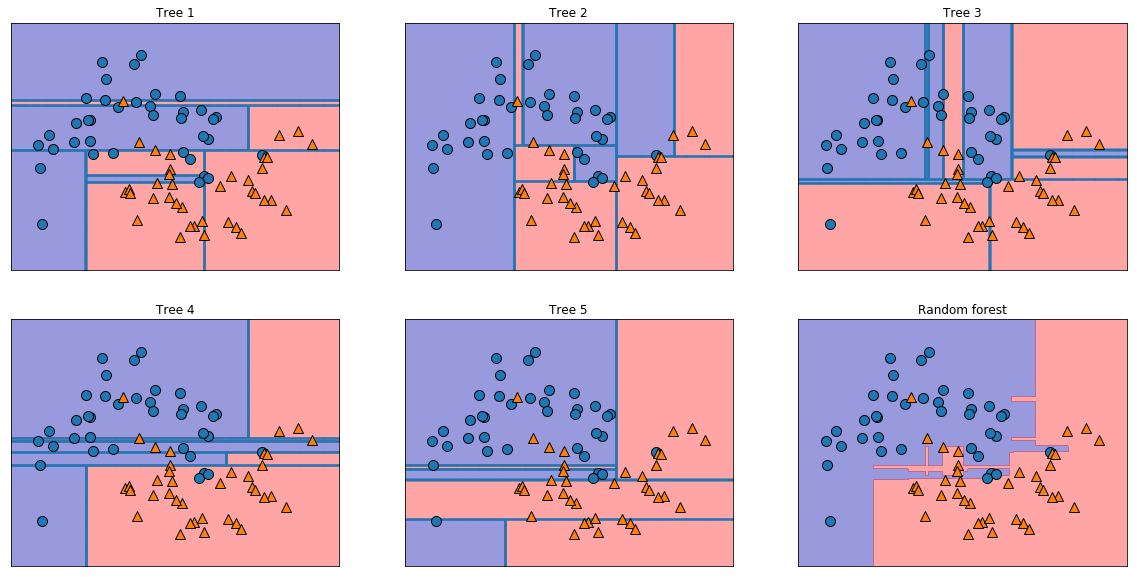

In [77]:
import mglearn


fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    ax.set_title("Tree {}".format(i+1))
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


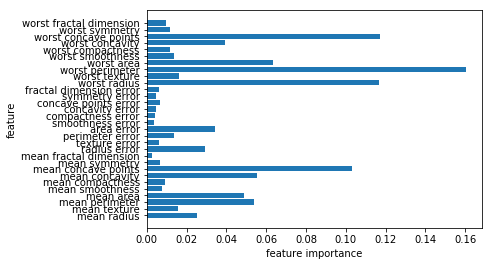

In [89]:
plt.subplots()
plot_feature_importance_cancer(forest)

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy of training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy of test set : {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy of training set: 1.000
Accuracy of test set : 0.958


In [3]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy of training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy of test set : {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy of training set: 0.991
Accuracy of test set : 0.972


In [4]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy of training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy of test set : {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy of training set: 0.988
Accuracy of test set : 0.965


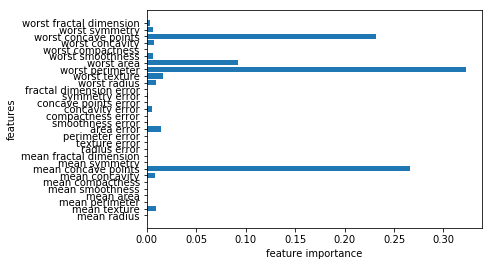

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)


def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.ylabel("features")
    plt.xlabel("feature importance")

plot_feature_importances_cancer(gbrt)

Text(0,0.5,'Feature 1')

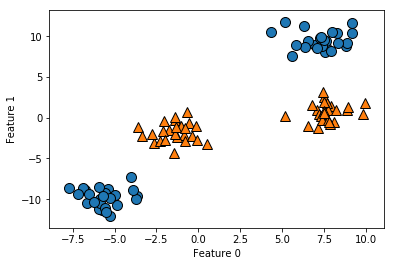

In [38]:
from sklearn.datasets import make_blobs
import mglearn

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'Feature 1')

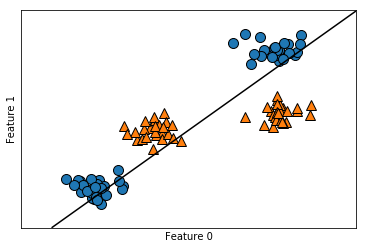

In [9]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'feature 1 ** 2')

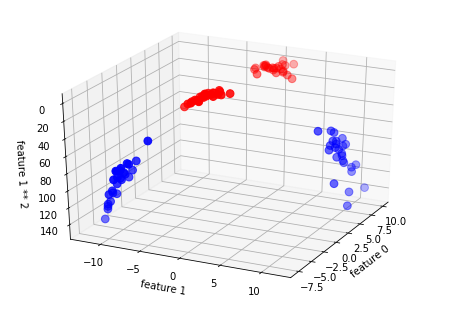

In [39]:
X_new = np.hstack([X, X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5,0,'feature ) ** 2')

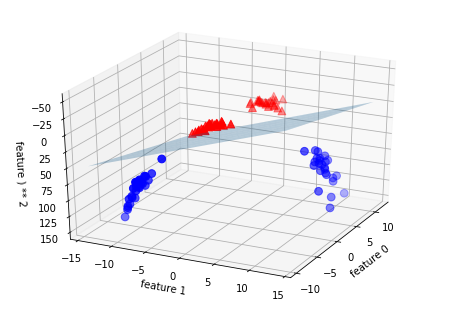

In [65]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature ) ** 2")

Text(0,0.5,'feature 1')

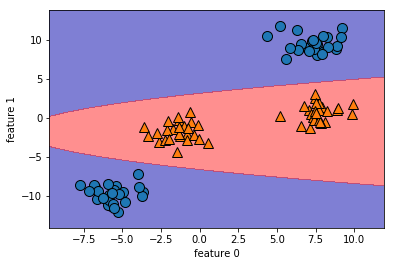

In [80]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0,0.5,'feature 1')

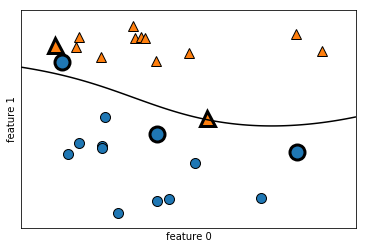

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import mglearn

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#plot support vectors
sv = svm.support_vectors_
#label the class
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

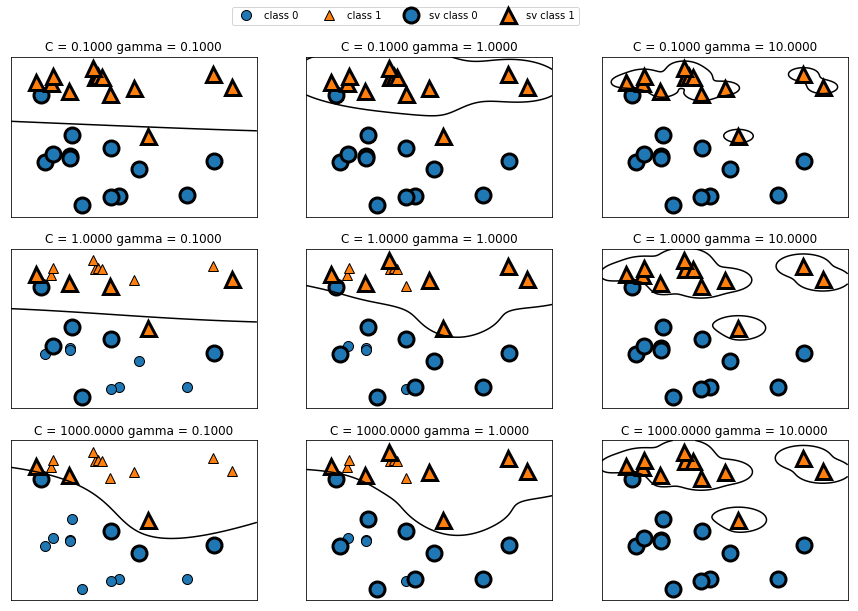

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes,[-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(.9,1.2))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [6]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy of training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy of test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy of training set: 1.00
Accuracy of test set: 0.63


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


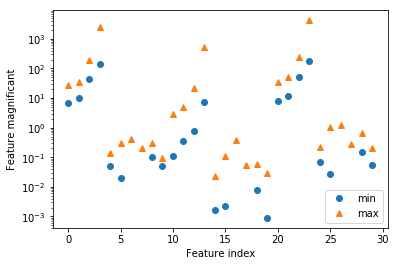

In [29]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnificant")
plt.yscale("log")

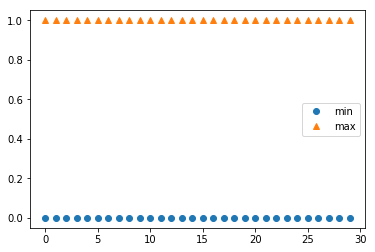

In [34]:
min_on_training = X_train.min(axis=0)
range_on_training_f = X_train.max(axis=0) - X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training)/range_on_training
plt.plot(X_train_scaled.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled.max(axis=0), '^', label="max")
plt.legend()

In [35]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy of training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy of test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy of traing set: 0.948
Accuracy of test set: 0.951


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy of training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy of test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.972


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0,0.5,'relu(x), tanh(x)')

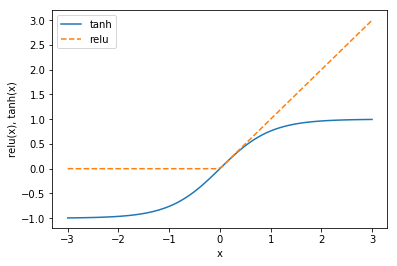

In [40]:
import numpy as np

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), '--',label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Feature 1')

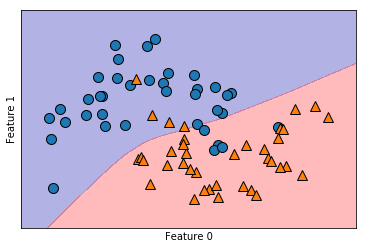

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Feature 1')

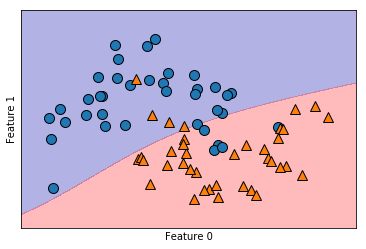

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import mglearn

mlp = MLPClassifier(random_state=0, activation='tanh',hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

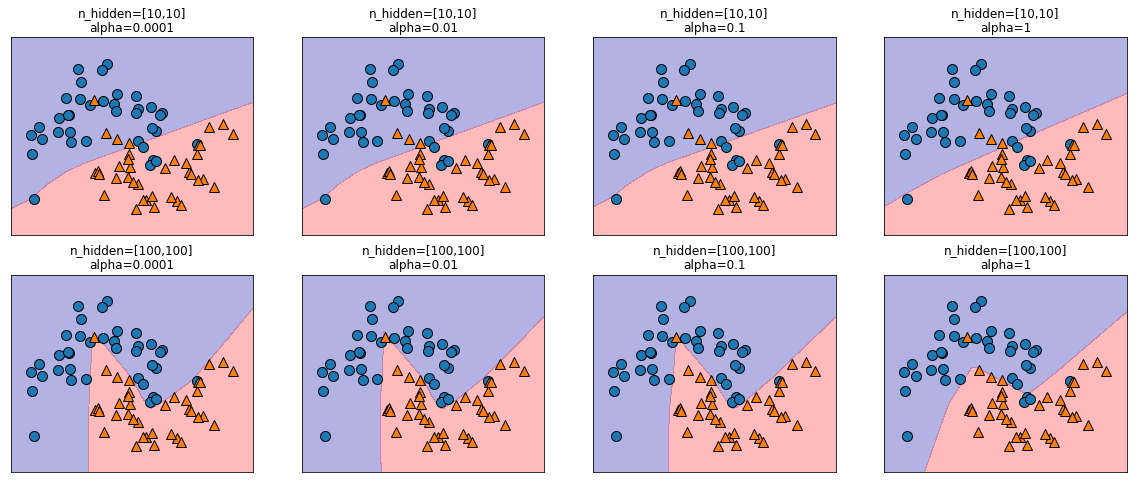

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [24]:
print("Cancer data per-feature: {}".format(cancer.data.max(axis=0)))

Cancer data per-feature: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.9389671361502347
Accuracy on test set: 0.916083916083916


In [28]:
mean_on_train = X_train.mean(axis=0)
sd_on_train = X_train.std(axis=0)

X_train_scaled = (X_train-mean_on_train)/sd_on_train
X_test_scaled = (X_test-mean_on_train)/sd_on_train

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [29]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.97


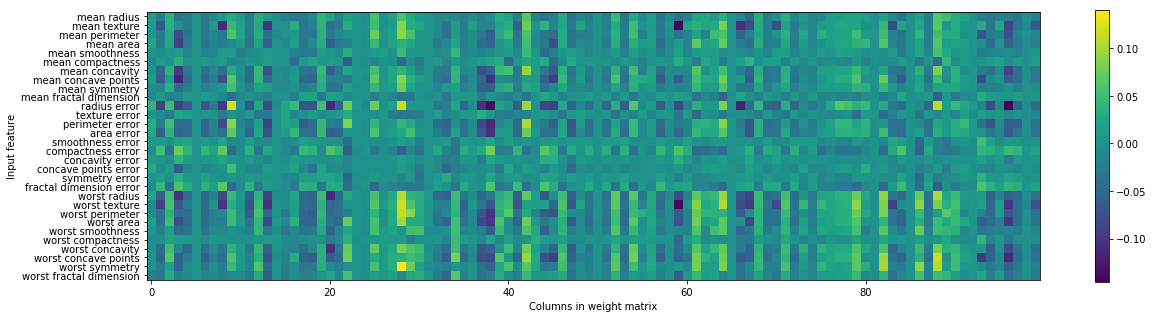

In [63]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none',cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
import numpy as np
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [38]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [40]:
print("X_test shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test shape: (25, 2)
Decision function shape: (25,)


In [41]:
print("Decision function: \n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function: 
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [43]:
print("Thresholded decision function: \n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions: \n{}".format(gbrt.predict(X_test)))

Thresholded decision function: 
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions: 
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [44]:
print(gbrt.classes_)

['blue' 'red']


In [48]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print(np.all(pred == gbrt.predict(X_test)))

True


In [50]:
decision_function = gbrt.decision_function(X_test)
print([np.min(decision_function), np.max(decision_function)])

[-7.69097177301218, 4.289866676868515]


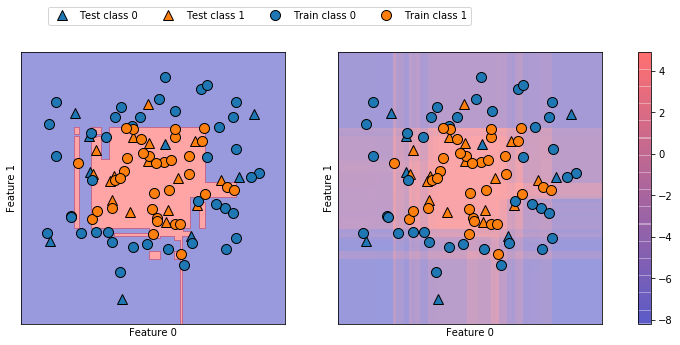

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1,1.1))

In [66]:
print("Predicted probabilities: \n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities: 
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [70]:
np.all(gbrt.predict_proba(X_test[:6]).sum(axis=1) == 1)

True

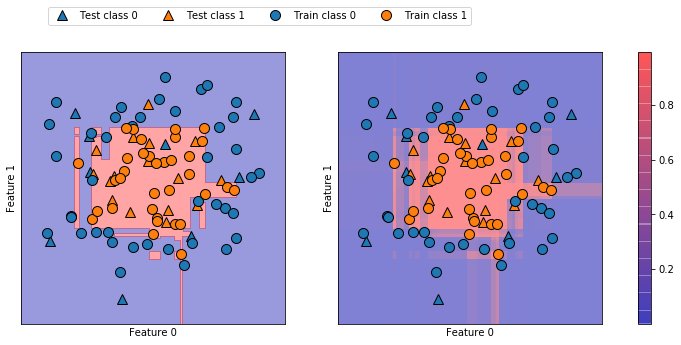

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [74]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Decision function: \n{}".format(gbrt.decision_function(X_test)[:6,:]))

Decision function shape: (38, 3)
Decision function: 
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [76]:
print("Argmax of decision function: \n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [86]:
print("Predicted probabilities: \n{}".format(gbrt.predict_proba(X_test)[:6]))
print(gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities: 
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
[1. 1. 1. 1. 1. 1.]


In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [6]:
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))

unique classes: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yue.yuan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [7]:
import numpy as np

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))

argmax of decision function: [1 0 2 1 1 0 1 2 1 1]


In [8]:
print("argmax with classes: {}".format(logreg.classes_[argmax_dec_func][:10]))

argmax with classes: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
